In [12]:
pwd

'c:\\Users\\cutic\\OneDrive\\Escritorio\\Tecnológico de Monterrey\\Octavo semestre\\Desarrollo de aplicaciones avanzadas de ciencias computacionales\\IAModulo2'

# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



base_dir = os.path.abspath(os.getcwd())

print(base_dir)

train_dir = os.path.join(base_dir,'Train')
print(train_dir)
test_dir = os.path.join(base_dir, 'Test')
print(test_dir)
train_datagen = ImageDataGenerator(
							rescale = 1./255,
                            #Agregar rotación aporta variablidad y ayuda a que el modelo sea capaz de reconocer al animal en diferentes orientaciones
							rotation_range = 30,
                            #Hacer estos cambios de posición hacen que el modelo pueda identificar mejor al objeto posicionado en distintas partes de la imagen
							width_shift_range = 0.2,
							height_shift_range = 0.2,
                            #este parametro distorsiona la imagen extendiendola (tilting) hacia un lado. nos puede ayudar a identificar las imagenes en esccenarios de movimiento
							shear_range = 0.2,
                            #Esto ayuda a poder reconocer los animales a diferentes escalas de tamaño en la imagen
							zoom_range = 0.3,
                            #Invertir la imagen ayuda a tener mas variedad de posicionamiento, para poder clasificar mejor en disitntas posiciones
							horizontal_flip = True,)
							



c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear\Train
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\IAModulo2\pandaorbear\Test


En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 500 images belonging to 2 classes.
(8, 150, 150, 3)
[1. 0. 1. 0. 0. 0. 1. 0.]


<Figure size 640x480 with 0 Axes>

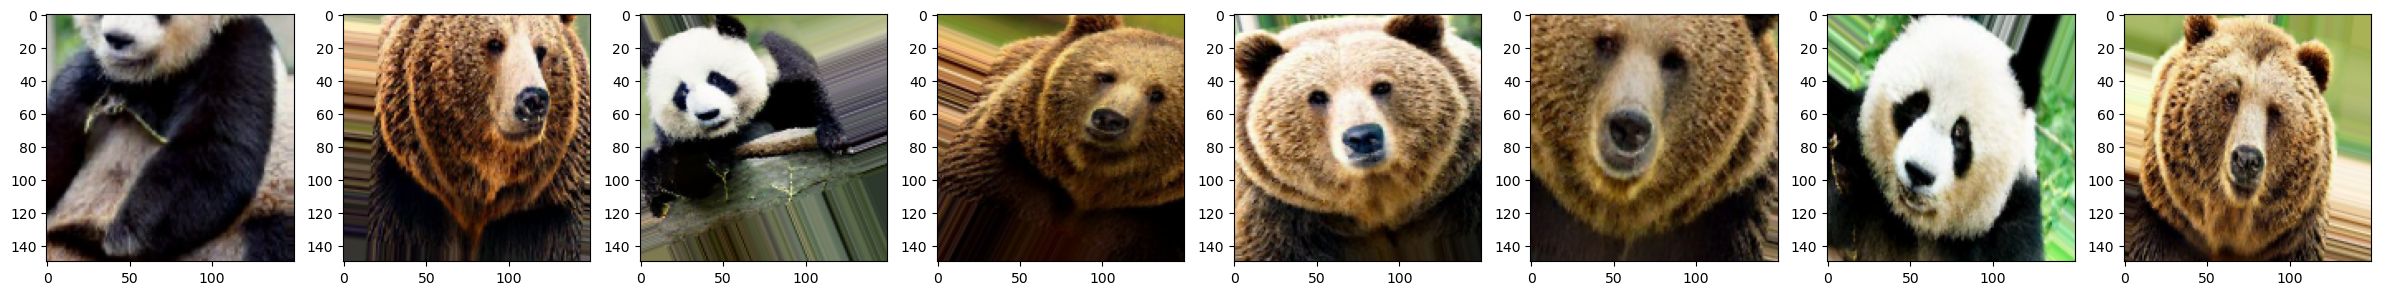

In [7]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

## Modelo 1: Red convolutiva básica

In [10]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-2),
						metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_1 (Flatten)         (None, 219040)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               28037248  
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,037,657
Trainable params: 28,037,657
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
63/63 [==============================] - 13s 195ms/step - loss: 45.8539 - acc: 0.7520
Epoch 2/10
63/63 [==============================] - 12s 196ms/step - loss: 1.8174 - acc: 0.7900
Epoch 3/10
63/63 [==============================] - 12s 195ms/step - loss: 0.2746 - acc: 0.9020
Epoch 4/10
63/63 [==============================] - 12s 195ms/step - loss: 0.2933 - acc: 0.8820
Epoch 5/10
63/63 [==============================] - 12s 196ms/step - loss: 0.2013 - acc: 0.9380
Epoch 6/10
63/63 [==============================] - 12s 197ms/step - loss: 0.1807 - acc: 0.9420
Epoch 7/10
63/63 [==============================] - 13s 199ms/step - loss: 0.1593 - acc: 0.9460
Epoch 8/10
63/63 [==============================] - 13s 203ms/step - loss: 0.1456 - acc: 0.9540
Epoch 9/10
63/63 [==============================] - 13s 200ms/step - loss: 0.1249 - acc: 0.9660
Epoch 10/10
63/63 [==============================] - 14s 217ms/step - loss: 0.1384 - acc: 0.9440


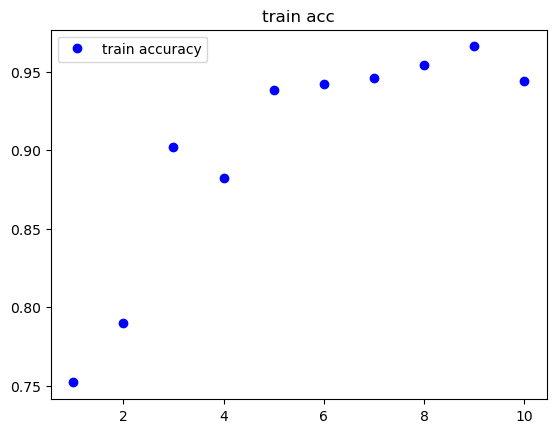

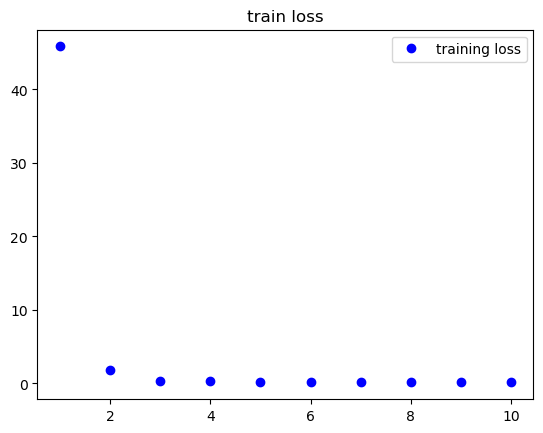

In [11]:

history = model.fit(
						train_generator, 
						epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [21]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 5,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
10/10 [==============================] - 0s 15ms/step - loss: 417.3266 - acc: 0.5800

test acc :
 0.5799999833106995


Vemos un desempeño pobre en el modelo, con un accuracy de 0.94 en train y apenas 0.57 en test. Probemos modificando hiperparámetros como el learning rate, así como agregando una capa densa adicional para atrapar caracerísticas

## Modelo 2

In [24]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-3),
						metrics=['acc'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_3 (Flatten)         (None, 219040)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               28037248  
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,037,657
Trainable params: 28,037,657
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
63/63 [==============================] - 13s 201ms/step - loss: 14.1426 - acc: 0.8360
Epoch 2/10
63/63 [==============================] - 12s 196ms/step - loss: 1.1832 - acc: 0.9360
Epoch 3/10
63/63 [==============================] - 12s 196ms/step - loss: 0.1608 - acc: 0.9560
Epoch 4/10
63/63 [==============================] - 12s 194ms/step - loss: 0.1421 - acc: 0.9720
Epoch 5/10
63/63 [==============================] - 12s 194ms/step - loss: 0.1939 - acc: 0.9520
Epoch 6/10
63/63 [==============================] - 12s 196ms/step - loss: 0.0540 - acc: 0.9840
Epoch 7/10
63/63 [==============================] - 12s 197ms/step - loss: 0.2849 - acc: 0.9720
Epoch 8/10
63/63 [==============================] - 12s 197ms/step - loss: 0.1479 - acc: 0.9700
Epoch 9/10
63/63 [==============================] - 14s 217ms/step - loss: 0.0398 - acc: 0.9900
Epoch 10/10
63/63 [==============================] - 13s 201ms/step - loss: 0.0623 - acc: 0.9900


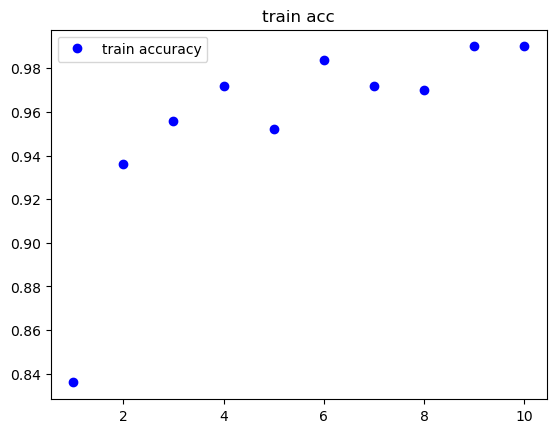

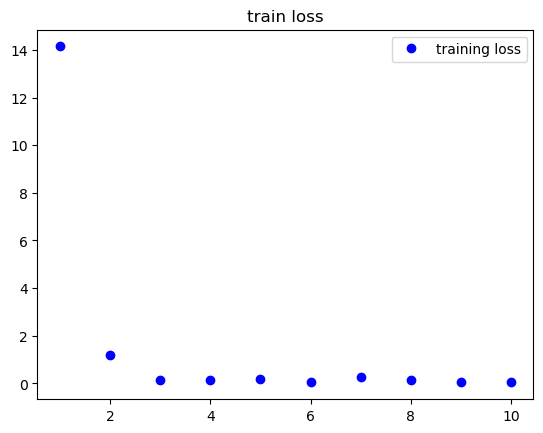

In [25]:

history = model.fit(
						train_generator, 
						epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [27]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 5,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
10/10 [==============================] - 0s 19ms/step - loss: 2.7079 - acc: 0.9800

test acc :
 0.9800000190734863


Vemos una mejora muy grande, en parte debido a la simplicidad del dataset. Tenemos un desempeño de 0.99 en train y 0.98 en test. Probemos ahora con transfer learning, para ver si un modelo preentrenado de alta calidad es capaz de perfeccionar el modelo bajo las pruebas existentes

## Modelo 3: Transfer Learning (MobileNetV2)

In [28]:
from tensorflow import keras
from tensorflow.keras import layers 

In [68]:
# Instanciamos Mobile Net v2
base_model = keras.applications.MobileNetV2(include_top=False, input_shape=(150,150,3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


# Compilamos el modelo utilizando el optimizador Adam, así como una función de pérdida para funciones sparse binaria
"""model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.BinaryCrossentropy(from_logits=False)],
    metrics=["accuracy"],
)"""

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-3),
						metrics=['acc'])


In [69]:
#Entrenamiento con 10 épocas

history = model.fit(
						train_generator, 
						epochs = 10)



Epoch 1/10
63/63 [==============================] - 34s 430ms/step - loss: 3.3104 - acc: 0.8740
Epoch 2/10
63/63 [==============================] - 24s 383ms/step - loss: 0.6948 - acc: 0.9220
Epoch 3/10
63/63 [==============================] - 28s 438ms/step - loss: 0.4991 - acc: 0.8820
Epoch 4/10
63/63 [==============================] - 30s 477ms/step - loss: 0.4718 - acc: 0.9200
Epoch 5/10
63/63 [==============================] - 29s 461ms/step - loss: 0.1531 - acc: 0.9340
Epoch 6/10
63/63 [==============================] - 25s 391ms/step - loss: 0.1830 - acc: 0.9720
Epoch 7/10
63/63 [==============================] - 24s 385ms/step - loss: 0.2953 - acc: 0.9620
Epoch 8/10
63/63 [==============================] - 26s 406ms/step - loss: 0.1359 - acc: 0.9680
Epoch 9/10
63/63 [==============================] - 28s 438ms/step - loss: 0.1749 - acc: 0.9780
Epoch 10/10
63/63 [==============================] - 29s 458ms/step - loss: 0.1130 - acc: 0.9800


In [71]:

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 5,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 20)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
20/20 [==============================] - 1s 45ms/step - loss: 24.9208 - acc: 0.5000

test acc :
 0.5


In [73]:
base_model = keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False


In [74]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [75]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-2),
              metrics=['accuracy'])


In [76]:
history = model.fit(train_generator,
                    epochs=10)


Epoch 1/10
63/63 [==============================] - 8s 85ms/step - loss: 1.4354 - accuracy: 0.9720
Epoch 2/10
63/63 [==============================] - 5s 75ms/step - loss: 2.6857e-22 - accuracy: 1.0000
Epoch 3/10
63/63 [==============================] - 5s 75ms/step - loss: 2.1464e-16 - accuracy: 1.0000
Epoch 4/10
63/63 [==============================] - 5s 77ms/step - loss: 2.2687e-21 - accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 5s 79ms/step - loss: 3.0833e-08 - accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 5s 82ms/step - loss: 1.1069e-07 - accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 5s 82ms/step - loss: 4.0188e-27 - accuracy: 1.0000
Epoch 8/10
63/63 [==============================] - 15s 234ms/step - loss: 8.7496e-18 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 7s 111ms/step - loss: 3.9721e-12 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 7s 108ms/step - loss:

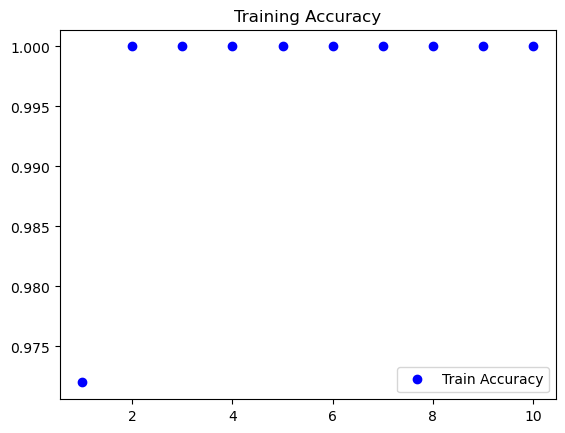

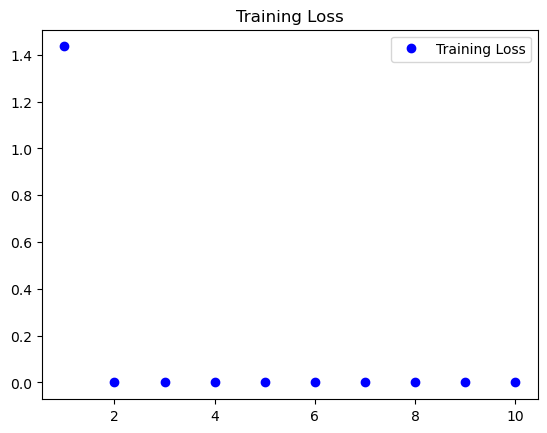

In [77]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()


In [78]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)


Found 100 images belonging to 2 classes.


In [79]:
test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('\nTest Accuracy:', test_acc)


10/10 [==============================] - 3s 96ms/step - loss: 4.3724e-30 - accuracy: 1.0000

Test Accuracy: 1.0
